In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# macOS용 한글 폰트 설정

# macOS에서 사용 가능한 한글 폰트들
macos_korean_fonts = [
    '/System/Library/Fonts/AppleGothic.ttf',
    '/System/Library/Fonts/AppleSDGothicNeo.ttc',
    '/Library/Fonts/NanumGothic.ttf',
    '/Library/Fonts/NanumBarunGothic.ttf',
    '/System/Library/Fonts/PingFang.ttc'
]

# 사용 가능한 폰트 찾기
available_font = None
for font_path in macos_korean_fonts:
    if os.path.exists(font_path):
        available_font = font_path
        print(f"사용 가능한 폰트 발견: {font_path}")
        break

if available_font:
    # 폰트 설정
    font_prop = fm.FontProperties(fname=available_font)
    plt.rcParams['font.family'] = font_prop.get_name()
    plt.rcParams['axes.unicode_minus'] = False
    print(f"폰트 설정 완료: {font_prop.get_name()}")
else:
    # 기본 폰트로 설정
    plt.rcParams['font.family'] = 'AppleGothic'
    plt.rcParams['axes.unicode_minus'] = False
    print("기본 AppleGothic 폰트 사용")

사용 가능한 폰트 발견: /System/Library/Fonts/AppleSDGothicNeo.ttc
폰트 설정 완료: Apple SD Gothic Neo


In [3]:
# 데이터 로드
retail_df = pd.read_csv('../01_data_analysis/데이터_전처리후/5_매출현황/gyeonggi_retail_sales.csv')
service_df = pd.read_csv('../01_data_analysis/데이터_전처리후/5_매출현황/gyeonggi_service_sales.csv')
food_df = pd.read_csv('../01_data_analysis/데이터_전처리후/5_매출현황/gyeonggi_food_sales.csv')

print("=== 데이터 로드 완료 ===")
print(f"도소매 매출 데이터: {retail_df.shape}")
print(f"서비스 매출 데이터: {service_df.shape}")
print(f"외식 매출 데이터: {food_df.shape}")
print()

# 데이터 미리보기
print("=== 도소매 매출 데이터 미리보기 ===")
print(retail_df.head())
print("\n=== 서비스 매출 데이터 미리보기 ===")
print(service_df.head())
print("\n=== 외식 매출 데이터 미리보기 ===")
print(food_df.head())
print()

=== 데이터 로드 완료 ===
도소매 매출 데이터: (56, 6)
서비스 매출 데이터: (88, 6)
외식 매출 데이터: (120, 6)

=== 도소매 매출 데이터 미리보기 ===
     yr indutyMlsfcNm areaNm  frcsCnt  arUnitAvrgSlsAmt crrncyUnitCdNm
0  2017           편의점     경기    700.0              24.0       (단위 :천원)
1  2017       의류 / 패션     경기  77135.0            1703.0       (단위 :천원)
2  2017         기타도소매     경기  14928.0             468.0       (단위 :천원)
3  2017         종합소매점     경기  32339.0             140.0       (단위 :천원)
4  2017           화장품     경기   5965.0             167.0       (단위 :천원)

=== 서비스 매출 데이터 미리보기 ===
     yr indutyMlsfcNm areaNm  frcsCnt  arUnitAvrgSlsAmt crrncyUnitCdNm
0  2017       반려동물 관련     경기  15353.0             271.0       (단위 :천원)
1  2017            오락     경기  16030.0              66.0       (단위 :천원)
2  2017        스포츠 관련     경기  16326.0              81.0       (단위 :천원)
3  2017           이미용     경기   7252.0              91.0       (단위 :천원)
4  2017         인력 파견     경기   4605.0              34.0       (단위 :천원)

=== 외식 매출 데이터 미리보기 

=== 1. 연도별 매출 추이 분석 ===


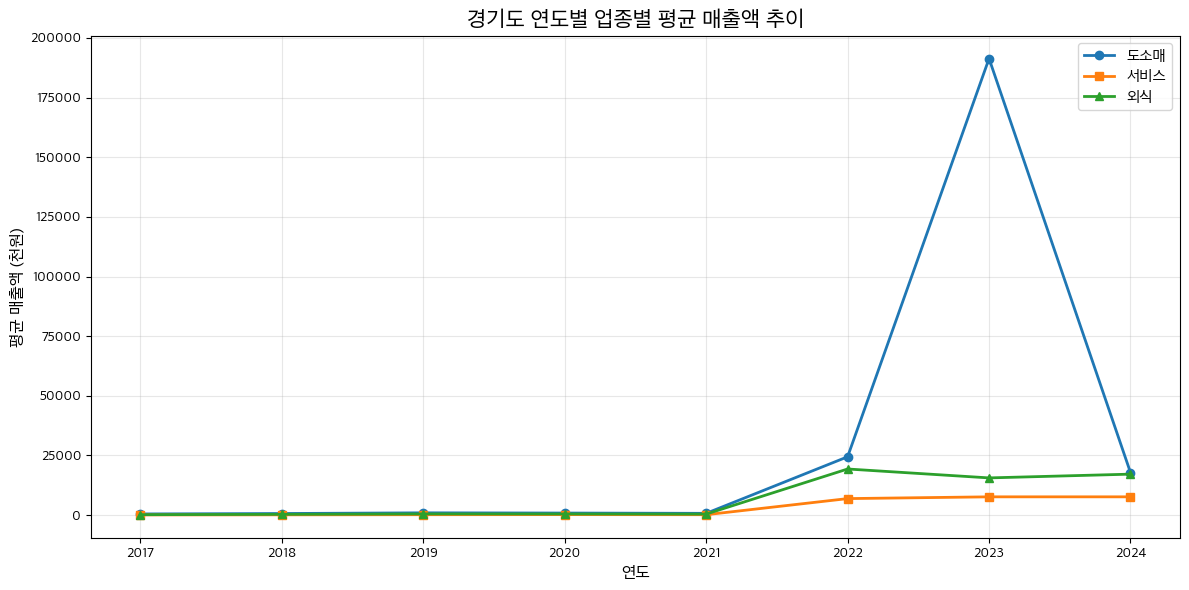

연도별 평균 매출액 (천원):
도소매: {2017: 510.42857142857144, 2018: 685.5714285714286, 2019: 977.0, 2020: 882.5714285714286, 2021: 763.5714285714286, 2022: 24461.428571428572, 2023: 191318.0, 2024: 17847.571428571428}
서비스: {2017: 106.72727272727273, 2018: 145.27272727272728, 2019: 194.45454545454547, 2020: 233.27272727272728, 2021: 193.1818181818182, 2022: 6939.727272727273, 2023: 7677.909090909091, 2024: 7679.909090909091}
외식: {2017: 198.13333333333333, 2018: 353.73333333333335, 2019: 522.8, 2020: 506.8666666666667, 2021: 452.4, 2022: 19344.333333333332, 2023: 15611.6, 2024: 17184.533333333333}



In [5]:
# 1. 연도별 매출 추이 분석
def analyze_yearly_trends():
    print("=== 1. 연도별 매출 추이 분석 ===")
    
    # 연도별 평균 매출액 계산
    retail_yearly = retail_df.groupby('yr')['arUnitAvrgSlsAmt'].mean()
    service_yearly = service_df.groupby('yr')['arUnitAvrgSlsAmt'].mean()
    food_yearly = food_df.groupby('yr')['arUnitAvrgSlsAmt'].mean()
    
    # 시각화
    plt.figure(figsize=(12, 6))
    plt.plot(retail_yearly.index, retail_yearly.values, marker='o', label='도소매', linewidth=2)
    plt.plot(service_yearly.index, service_yearly.values, marker='s', label='서비스', linewidth=2)
    plt.plot(food_yearly.index, food_yearly.values, marker='^', label='외식', linewidth=2)
    
    plt.title('경기도 연도별 업종별 평균 매출액 추이', fontsize=16, fontweight='bold')
    plt.xlabel('연도', fontsize=12)
    plt.ylabel('평균 매출액 (천원)', fontsize=12)
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # 통계 출력
    print("연도별 평균 매출액 (천원):")
    print("도소매:", retail_yearly.to_dict())
    print("서비스:", service_yearly.to_dict())
    print("외식:", food_yearly.to_dict())
    print()

analyze_yearly_trends()

=== 2. 2024년 업종별 매출 분석 ===


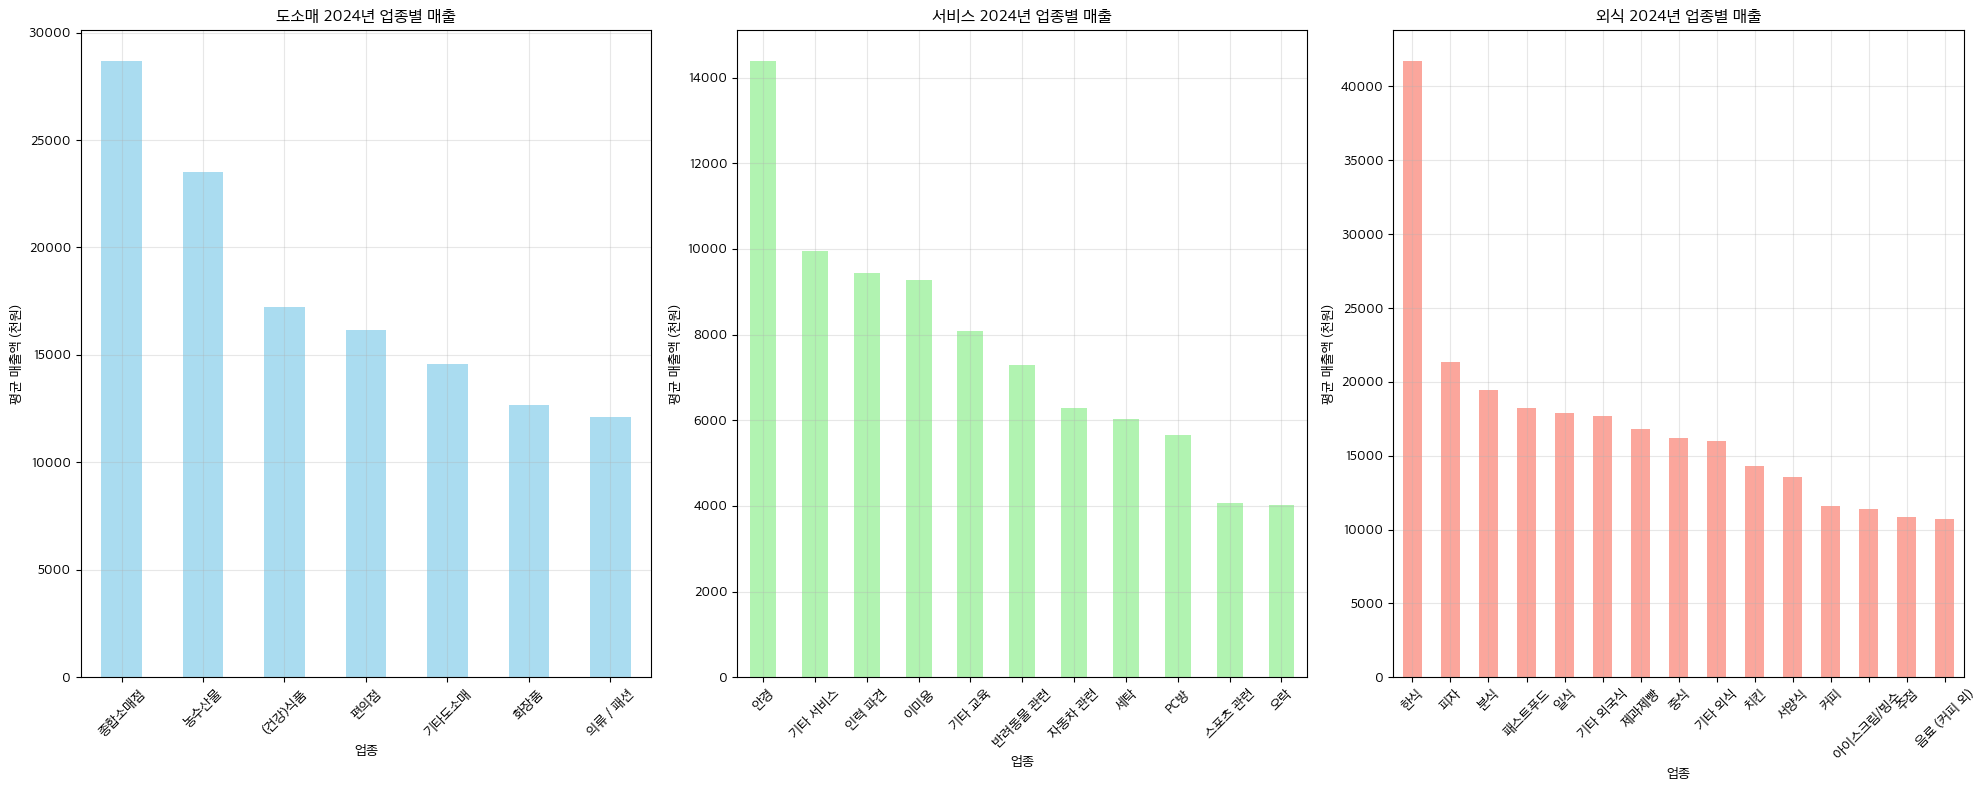

2024년 업종별 평균 매출액 (천원):
도소매 TOP 5: {'종합소매점': 28671.0, '농수산물': 23528.0, '(건강)식품': 17231.0, '편의점': 16148.0, '기타도소매': 14557.0}
서비스 TOP 5: {'안경': 14385.0, '기타 서비스': 9948.0, '인력 파견': 9448.0, '이미용': 9274.0, '기타 교육': 8076.0}
외식 TOP 5: {'한식': 41717.0, '피자': 21317.0, '분식': 19448.0, '패스트푸드': 18229.0, '일식': 17915.0}



In [7]:
# 2. 2024년 월별 매출 분석
def analyze_2024_industry():
    print("=== 2. 2024년 업종별 매출 분석 ===")
    
    # 2024년 데이터만 필터링
    retail_2024 = retail_df[retail_df['yr'] == 2024]
    service_2024 = service_df[service_df['yr'] == 2024]
    food_2024 = food_df[food_df['yr'] == 2024]
    
    # 업종별 평균 매출액 계산
    retail_industry = retail_2024.groupby('indutyMlsfcNm')['arUnitAvrgSlsAmt'].mean().sort_values(ascending=False)
    service_industry = service_2024.groupby('indutyMlsfcNm')['arUnitAvrgSlsAmt'].mean().sort_values(ascending=False)
    food_industry = food_2024.groupby('indutyMlsfcNm')['arUnitAvrgSlsAmt'].mean().sort_values(ascending=False)
    
    # 시각화
    fig, axes = plt.subplots(1, 3, figsize=(20, 8))
    
    # 도소매
    retail_industry.plot(kind='bar', ax=axes[0], color='skyblue', alpha=0.7)
    axes[0].set_title('도소매 2024년 업종별 매출', fontweight='bold')
    axes[0].set_xlabel('업종')
    axes[0].set_ylabel('평균 매출액 (천원)')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(True, alpha=0.3)
    
    # 서비스
    service_industry.plot(kind='bar', ax=axes[1], color='lightgreen', alpha=0.7)
    axes[1].set_title('서비스 2024년 업종별 매출', fontweight='bold')
    axes[1].set_xlabel('업종')
    axes[1].set_ylabel('평균 매출액 (천원)')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(True, alpha=0.3)
    
    # 외식
    food_industry.plot(kind='bar', ax=axes[2], color='salmon', alpha=0.7)
    axes[2].set_title('외식 2024년 업종별 매출', fontweight='bold')
    axes[2].set_xlabel('업종')
    axes[2].set_ylabel('평균 매출액 (천원)')
    axes[2].tick_params(axis='x', rotation=45)
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("2024년 업종별 평균 매출액 (천원):")
    print("도소매 TOP 5:", retail_industry.head().to_dict())
    print("서비스 TOP 5:", service_industry.head().to_dict())
    print("외식 TOP 5:", food_industry.head().to_dict())
    print()

analyze_2024_industry()

=== 3. 업종별 매출 비교 분석 ===


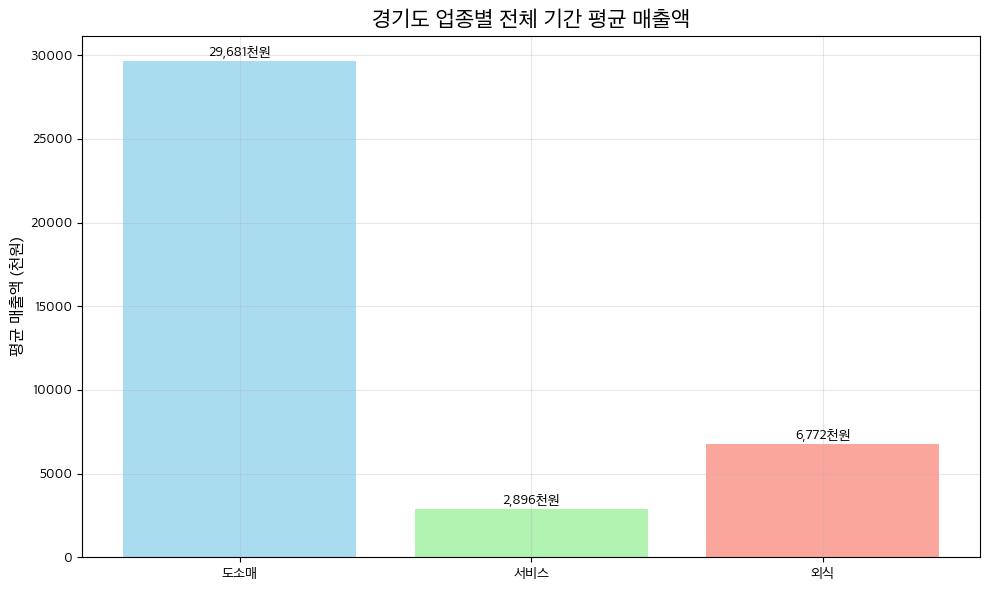

업종별 전체 기간 평균 매출액:
도소매: 29,681천원
서비스: 2,896천원
외식: 6,772천원



In [8]:
# 3. 업종별 매출 비교 분석
def analyze_industry_comparison():
    print("=== 3. 업종별 매출 비교 분석 ===")
    
    # 전체 기간 평균 매출액
    retail_avg = retail_df['arUnitAvrgSlsAmt'].mean()
    service_avg = service_df['arUnitAvrgSlsAmt'].mean()
    food_avg = food_df['arUnitAvrgSlsAmt'].mean()
    
    # 시각화
    industries = ['도소매', '서비스', '외식']
    averages = [retail_avg, service_avg, food_avg]
    colors = ['skyblue', 'lightgreen', 'salmon']
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(industries, averages, color=colors, alpha=0.7)
    
    # 값 표시
    for bar, avg in zip(bars, averages):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, 
                f'{avg:,.0f}천원', ha='center', va='bottom', fontweight='bold')
    
    plt.title('경기도 업종별 전체 기간 평균 매출액', fontsize=16, fontweight='bold')
    plt.ylabel('평균 매출액 (천원)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("업종별 전체 기간 평균 매출액:")
    print(f"도소매: {retail_avg:,.0f}천원")
    print(f"서비스: {service_avg:,.0f}천원")
    print(f"외식: {food_avg:,.0f}천원")
    print()

analyze_industry_comparison()

=== 4. 연도별 업종별 성장률 분석 ===


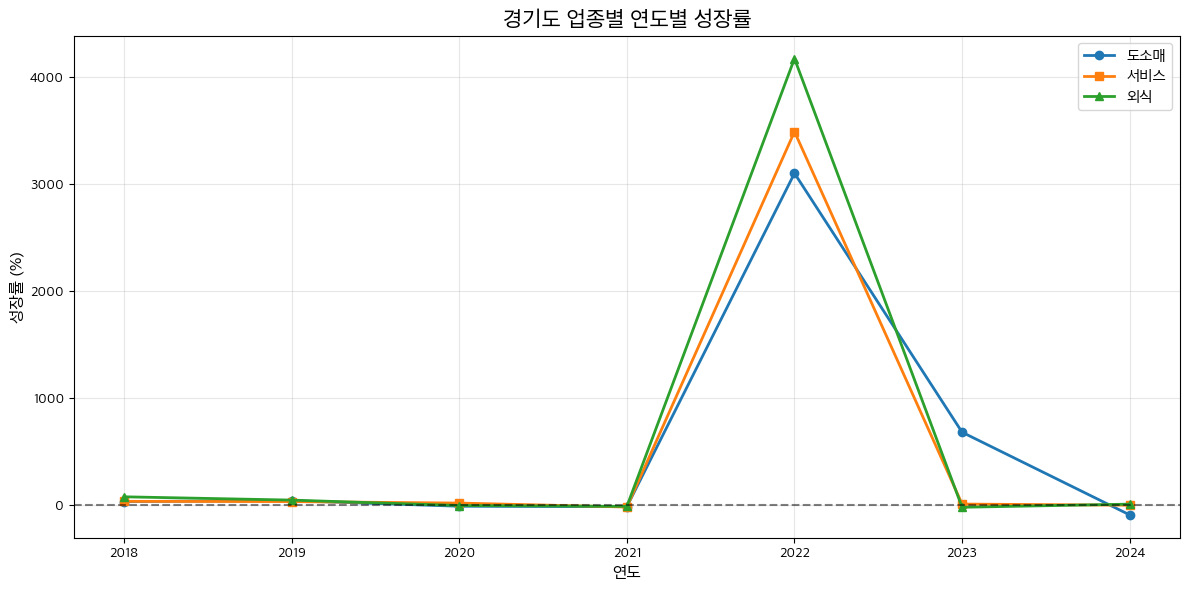

연도별 성장률 (%):
도소매: {2017: nan, 2018: 34.31290232297788, 2019: 42.508856011669096, 2020: -9.665155724521135, 2021: -13.483327937843958, 2022: 3103.55472404116, 2023: 682.1211236348771, 2024: -90.67125339561807}
서비스: {2017: nan, 2018: 36.11584327086883, 2019: 33.85481852315395, 2020: 19.96259934548854, 2021: -17.18628215120811, 2022: 3492.329411764706, 2023: 10.637043635458564, 2024: 0.026048758539842787}
외식: {2017: nan, 2018: 78.53297442799463, 2019: 47.79494911421032, 2020: -3.0476919153277104, 2021: -10.745758253321059, 2022: 4175.935750073681, 2023: -19.2962624713525, 2024: 10.075414008386918}



In [9]:
# 4. 연도별 업종별 성장률 분석
def analyze_growth_rates():
    print("=== 4. 연도별 업종별 성장률 분석 ===")
    
    # 연도별 평균 매출액
    retail_yearly = retail_df.groupby('yr')['arUnitAvrgSlsAmt'].mean()
    service_yearly = service_df.groupby('yr')['arUnitAvrgSlsAmt'].mean()
    food_yearly = food_df.groupby('yr')['arUnitAvrgSlsAmt'].mean()
    
    # 성장률 계산 (전년 대비)
    retail_growth = retail_yearly.pct_change() * 100
    service_growth = service_yearly.pct_change() * 100
    food_growth = food_yearly.pct_change() * 100
    
    # 시각화
    plt.figure(figsize=(12, 6))
    plt.plot(retail_growth.index[1:], retail_growth.values[1:], marker='o', label='도소매', linewidth=2)
    plt.plot(service_growth.index[1:], service_growth.values[1:], marker='s', label='서비스', linewidth=2)
    plt.plot(food_growth.index[1:], food_growth.values[1:], marker='^', label='외식', linewidth=2)
    
    plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    plt.title('경기도 업종별 연도별 성장률', fontsize=16, fontweight='bold')
    plt.xlabel('연도', fontsize=12)
    plt.ylabel('성장률 (%)', fontsize=12)
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("연도별 성장률 (%):")
    print("도소매:", retail_growth.to_dict())
    print("서비스:", service_growth.to_dict())
    print("외식:", food_growth.to_dict())
    print()

analyze_growth_rates()

=== 5. 연도별 업종별 매출 히트맵 ===


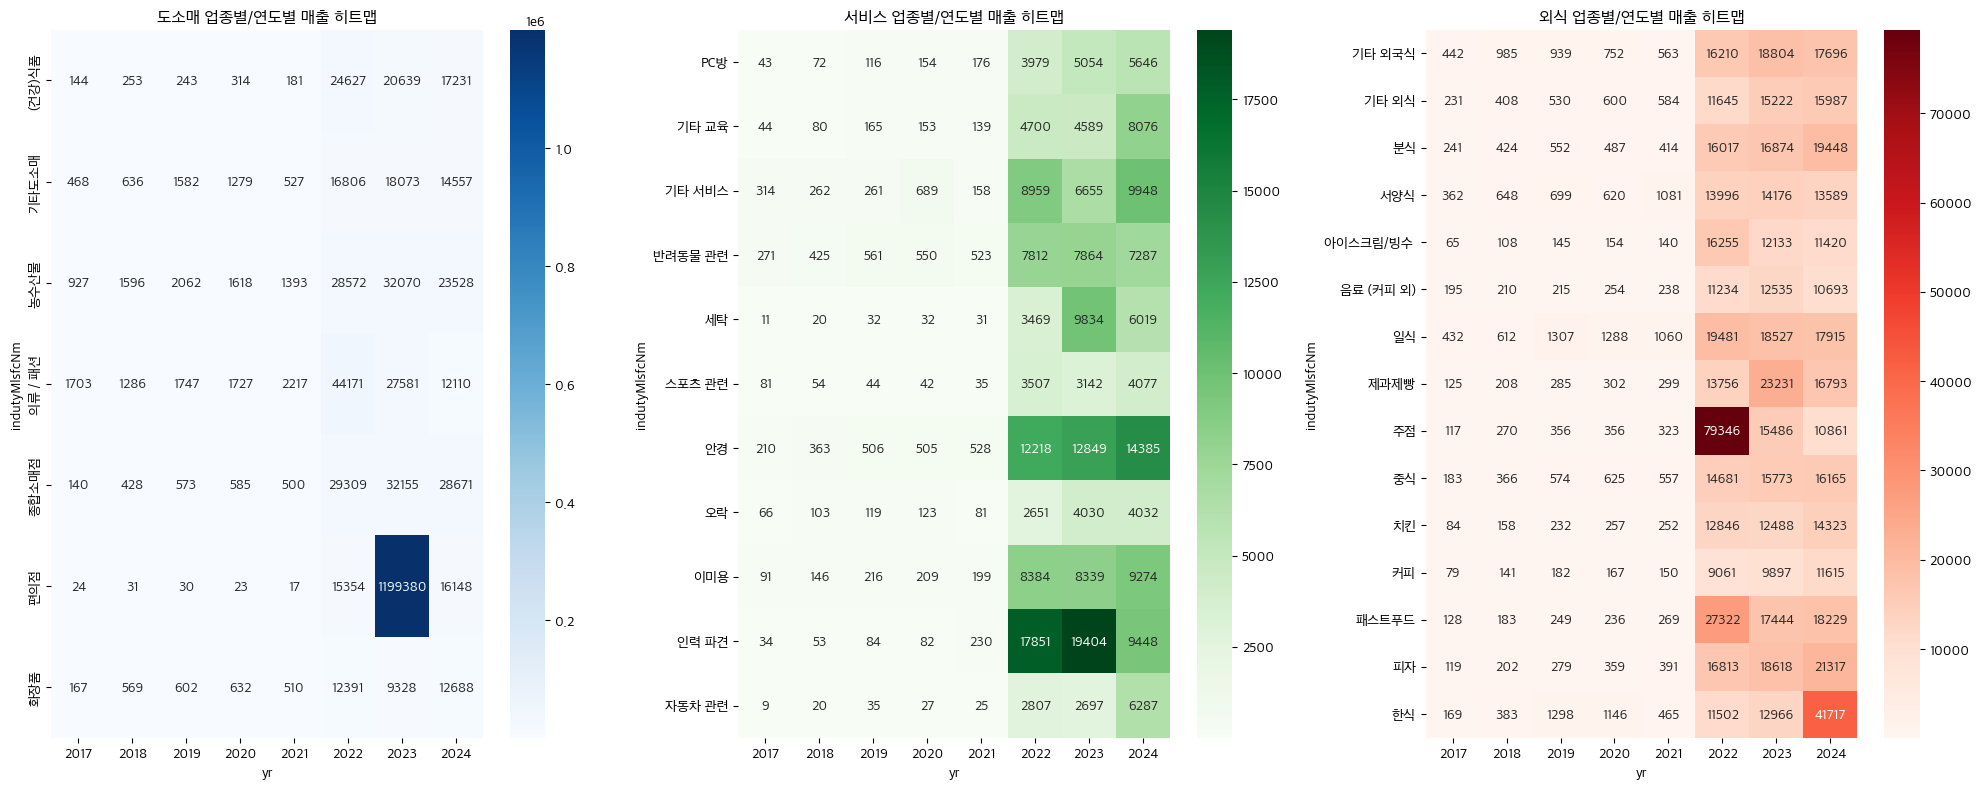

히트맵 데이터:
도소매 피벗 테이블:
yr               2017    2018    2019    2020    2021     2022       2023  \
indutyMlsfcNm                                                               
(건강)식품          144.0   253.0   243.0   314.0   181.0  24627.0    20639.0   
기타도소매           468.0   636.0  1582.0  1279.0   527.0  16806.0    18073.0   
농수산물            927.0  1596.0  2062.0  1618.0  1393.0  28572.0    32070.0   
의류 / 패션        1703.0  1286.0  1747.0  1727.0  2217.0  44171.0    27581.0   
종합소매점           140.0   428.0   573.0   585.0   500.0  29309.0    32155.0   
편의점              24.0    31.0    30.0    23.0    17.0  15354.0  1199380.0   
화장품             167.0   569.0   602.0   632.0   510.0  12391.0     9328.0   

yr                2024  
indutyMlsfcNm           
(건강)식품         17231.0  
기타도소매          14557.0  
농수산물           23528.0  
의류 / 패션        12110.0  
종합소매점          28671.0  
편의점            16148.0  
화장품            12688.0  

서비스 피벗 테이블:
yr              2017   2018   2019   2020   202

In [11]:
# 5. 연도별 업종별 히트맵
def create_yearly_heatmap():
    print("=== 5. 연도별 업종별 매출 히트맵 ===")
    
    # 피벗 테이블 생성
    retail_pivot = retail_df.pivot_table(values='arUnitAvrgSlsAmt', index='indutyMlsfcNm', columns='yr', aggfunc='mean')
    service_pivot = service_df.pivot_table(values='arUnitAvrgSlsAmt', index='indutyMlsfcNm', columns='yr', aggfunc='mean')
    food_pivot = food_df.pivot_table(values='arUnitAvrgSlsAmt', index='indutyMlsfcNm', columns='yr', aggfunc='mean')
    
    # 시각화
    fig, axes = plt.subplots(1, 3, figsize=(20, 8))
    
    sns.heatmap(retail_pivot, annot=True, fmt='.0f', cmap='Blues', ax=axes[0])
    axes[0].set_title('도소매 업종별/연도별 매출 히트맵', fontweight='bold')
    
    sns.heatmap(service_pivot, annot=True, fmt='.0f', cmap='Greens', ax=axes[1])
    axes[1].set_title('서비스 업종별/연도별 매출 히트맵', fontweight='bold')
    
    sns.heatmap(food_pivot, annot=True, fmt='.0f', cmap='Reds', ax=axes[2])
    axes[2].set_title('외식 업종별/연도별 매출 히트맵', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print("히트맵 데이터:")
    print("도소매 피벗 테이블:")
    print(retail_pivot)
    print("\n서비스 피벗 테이블:")
    print(service_pivot)
    print("\n외식 피벗 테이블:")
    print(food_pivot)
    print()

create_yearly_heatmap()

=== 6. 상세 통계 분석 ===
도소매 매출 통계:
count    5.600000e+01
mean     2.968077e+04
std      1.595582e+05
min      1.700000e+01
25%      4.920000e+02
50%      1.589000e+03
75%      1.631250e+04
max      1.199380e+06
Name: arUnitAvrgSlsAmt, dtype: float64

서비스 매출 통계:
count       88.000000
mean      2896.306818
std       4362.539228
min          9.000000
25%         81.000000
50%        266.500000
75%       4616.750000
max      19404.000000
Name: arUnitAvrgSlsAmt, dtype: float64

외식 매출 통계:
count      120.000000
mean      6771.800000
std      10568.647101
min         65.000000
25%        251.250000
50%        592.000000
75%      13630.750000
max      79346.000000
Name: arUnitAvrgSlsAmt, dtype: float64



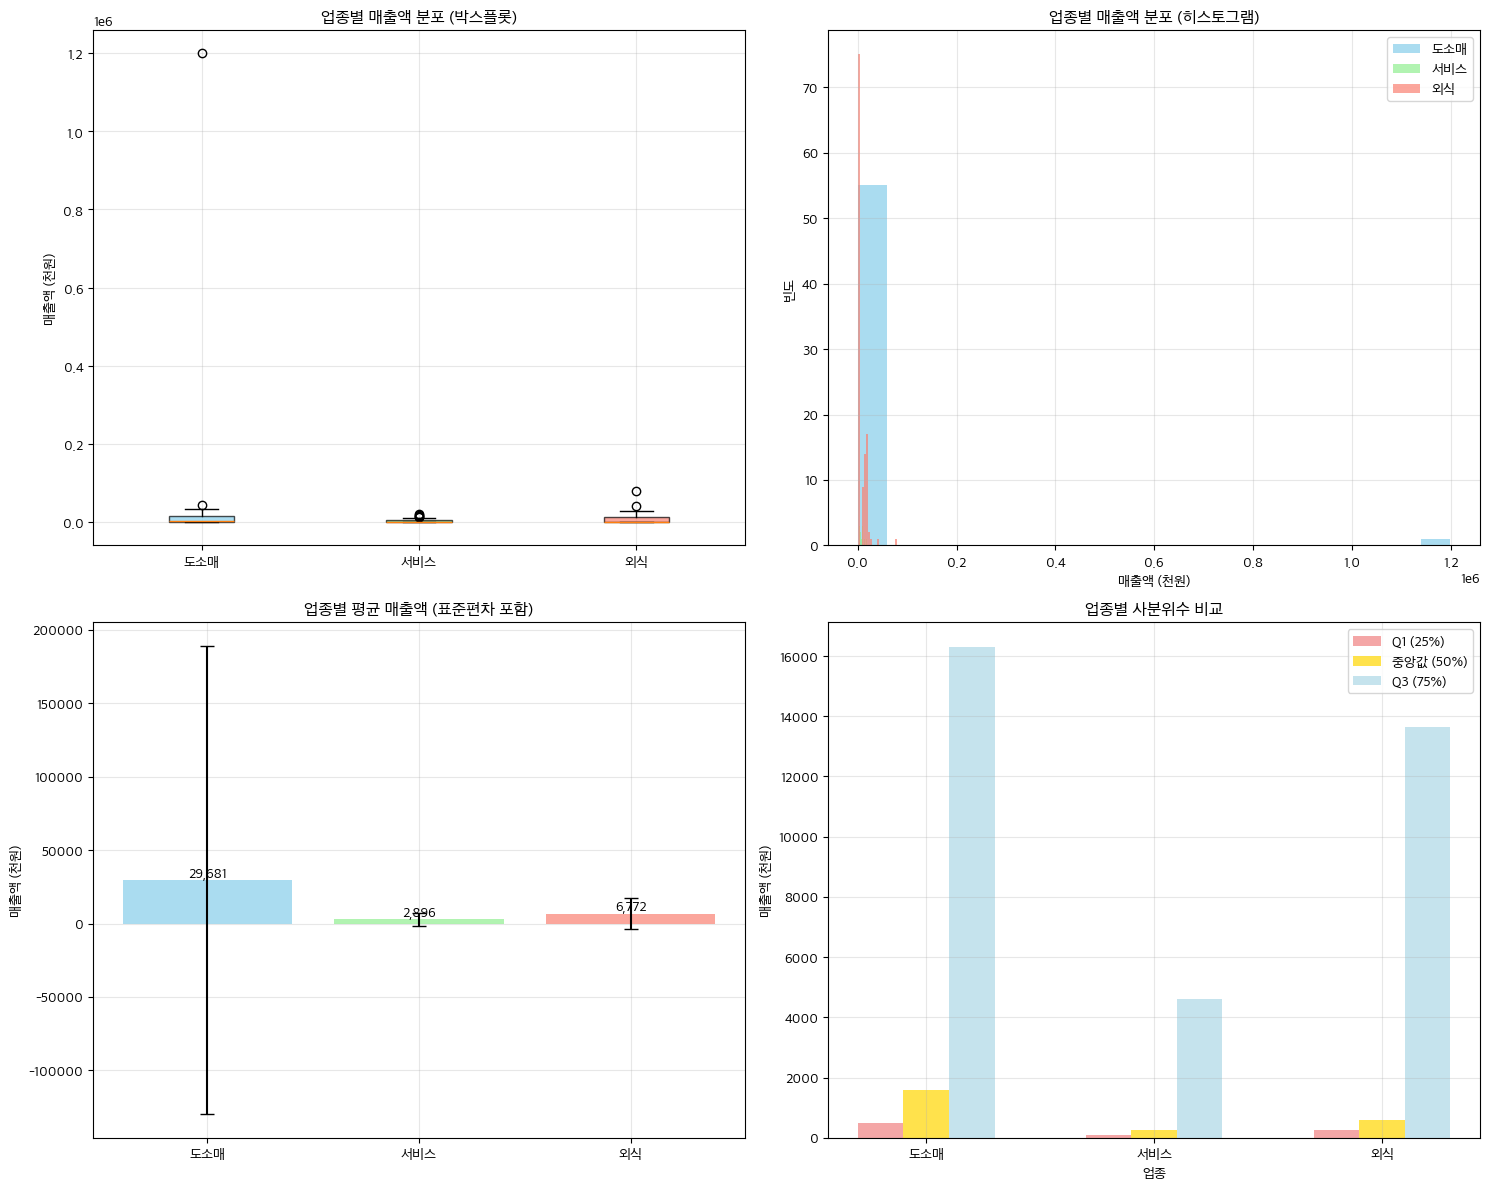

=== 최고/최저 매출 업종 ===
도소매 최고 매출: 2023년 편의점 - 1,199,380천원
도소매 최저 매출: 2021년 편의점 - 17천원

서비스 최고 매출: 2023년 인력 파견 - 19,404천원
서비스 최저 매출: 2017년 자동차 관련 - 9천원

외식 최고 매출: 2022년 주점 - 79,346천원
외식 최저 매출: 2017년 아이스크림/빙수  - 65천원



In [16]:
# 6. 상세 통계 분석
def detailed_statistics():
    print("=== 6. 상세 통계 분석 ===")
    
    # 각 업종별 통계
    retail_stats = retail_df['arUnitAvrgSlsAmt'].describe()
    service_stats = service_df['arUnitAvrgSlsAmt'].describe()
    food_stats = food_df['arUnitAvrgSlsAmt'].describe()
    
    print("도소매 매출 통계:")
    print(retail_stats)
    print("\n서비스 매출 통계:")
    print(service_stats)
    print("\n외식 매출 통계:")
    print(food_stats)
    print()
    
    # 통계 시각화
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. 박스플롯
    data = [retail_df['arUnitAvrgSlsAmt'], service_df['arUnitAvrgSlsAmt'], food_df['arUnitAvrgSlsAmt']]
    labels = ['도소매', '서비스', '외식']
    colors = ['skyblue', 'lightgreen', 'salmon']
    
    bp = axes[0,0].boxplot(data, labels=labels, patch_artist=True)
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    axes[0,0].set_title('업종별 매출액 분포 (박스플롯)', fontweight='bold')
    axes[0,0].set_ylabel('매출액 (천원)')
    axes[0,0].grid(True, alpha=0.3)
    
    # 2. 히스토그램
    axes[0,1].hist(retail_df['arUnitAvrgSlsAmt'], bins=20, alpha=0.7, label='도소매', color='skyblue')
    axes[0,1].hist(service_df['arUnitAvrgSlsAmt'], bins=20, alpha=0.7, label='서비스', color='lightgreen')
    axes[0,1].hist(food_df['arUnitAvrgSlsAmt'], bins=20, alpha=0.7, label='외식', color='salmon')
    axes[0,1].set_title('업종별 매출액 분포 (히스토그램)', fontweight='bold')
    axes[0,1].set_xlabel('매출액 (천원)')
    axes[0,1].set_ylabel('빈도')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    # 3. 평균 비교 막대그래프
    means = [retail_stats['mean'], service_stats['mean'], food_stats['mean']]
    stds = [retail_stats['std'], service_stats['std'], food_stats['std']]
    
    bars = axes[1,0].bar(labels, means, yerr=stds, capsize=5, color=colors, alpha=0.7)
    axes[1,0].set_title('업종별 평균 매출액 (표준편차 포함)', fontweight='bold')
    axes[1,0].set_ylabel('매출액 (천원)')
    axes[1,0].grid(True, alpha=0.3)
    
    # 값 표시
    for bar, mean in zip(bars, means):
        axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, 
                      f'{mean:,.0f}', ha='center', va='bottom', fontweight='bold')
    
    # 4. 중앙값과 사분위수 비교
    medians = [retail_stats['50%'], service_stats['50%'], food_stats['50%']]
    q1 = [retail_stats['25%'], service_stats['25%'], food_stats['25%']]
    q3 = [retail_stats['75%'], service_stats['75%'], food_stats['75%']]
    
    x_pos = np.arange(len(labels))
    axes[1,1].bar(x_pos - 0.2, q1, width=0.2, label='Q1 (25%)', color='lightcoral', alpha=0.7)
    axes[1,1].bar(x_pos, medians, width=0.2, label='중앙값 (50%)', color='gold', alpha=0.7)
    axes[1,1].bar(x_pos + 0.2, q3, width=0.2, label='Q3 (75%)', color='lightblue', alpha=0.7)
    
    axes[1,1].set_title('업종별 사분위수 비교', fontweight='bold')
    axes[1,1].set_xlabel('업종')
    axes[1,1].set_ylabel('매출액 (천원)')
    axes[1,1].set_xticks(x_pos)
    axes[1,1].set_xticklabels(labels)
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 최고/최저 매출 업종
    print("=== 최고/최저 매출 업종 ===")
    for df, name in [(retail_df, '도소매'), (service_df, '서비스'), (food_df, '외식')]:
        max_idx = df['arUnitAvrgSlsAmt'].idxmax()
        min_idx = df['arUnitAvrgSlsAmt'].idxmin()
        
        print(f"{name} 최고 매출: {df.loc[max_idx, 'yr']}년 {df.loc[max_idx, 'indutyMlsfcNm']} - {df.loc[max_idx, 'arUnitAvrgSlsAmt']:,.0f}천원")
        print(f"{name} 최저 매출: {df.loc[min_idx, 'yr']}년 {df.loc[min_idx, 'indutyMlsfcNm']} - {df.loc[min_idx, 'arUnitAvrgSlsAmt']:,.0f}천원")
        print()
        
detailed_statistics()

=== 7. 업체수와 매출액 상관관계 분석 ===


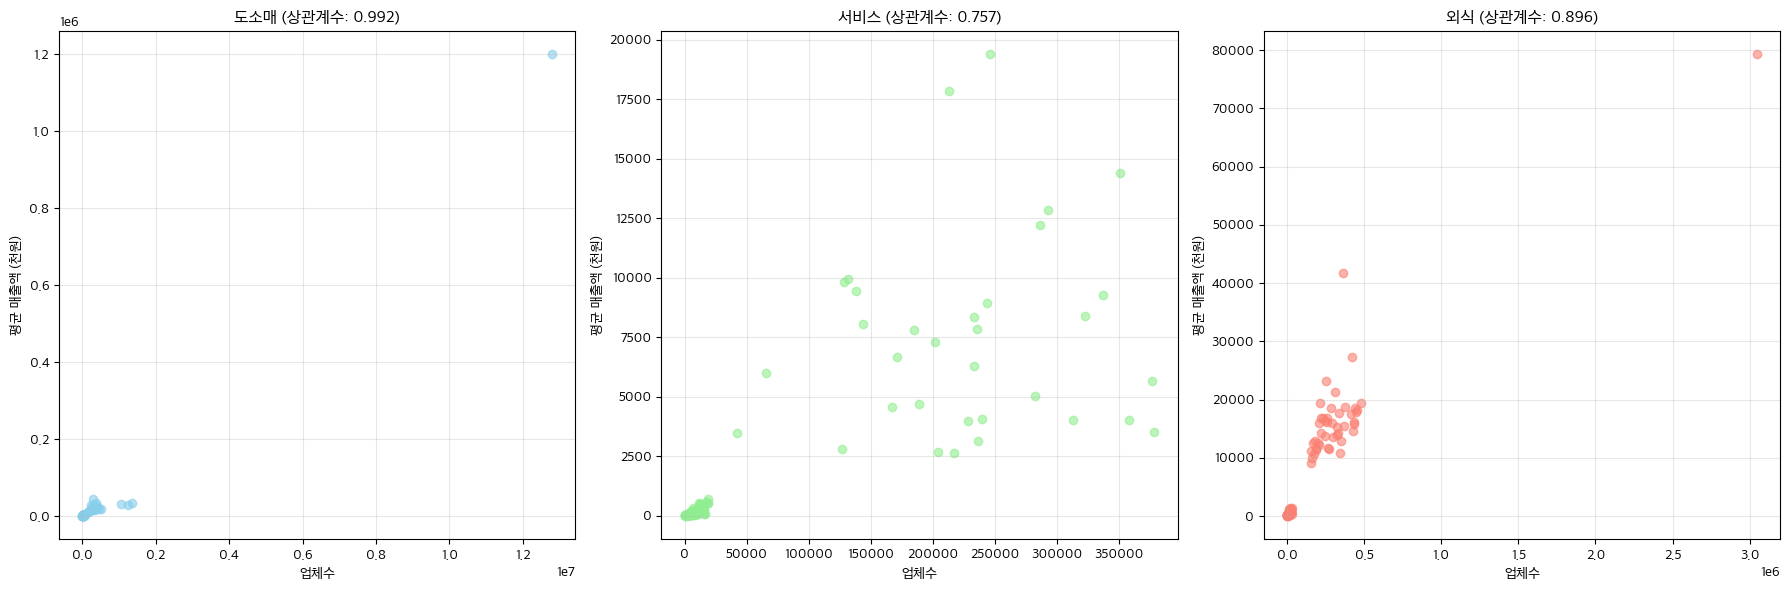

업체수와 매출액 상관계수:
도소매: 0.992
서비스: 0.757
외식: 0.896



In [14]:
# 7. 업체수와 매출액 상관관계 분석
def analyze_correlation():
    print("=== 7. 업체수와 매출액 상관관계 분석 ===")
    
    # 상관관계 계산
    retail_corr = retail_df['frcsCnt'].corr(retail_df['arUnitAvrgSlsAmt'])
    service_corr = service_df['frcsCnt'].corr(service_df['arUnitAvrgSlsAmt'])
    food_corr = food_df['frcsCnt'].corr(food_df['arUnitAvrgSlsAmt'])
    
    # 시각화
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    axes[0].scatter(retail_df['frcsCnt'], retail_df['arUnitAvrgSlsAmt'], alpha=0.6, color='skyblue')
    axes[0].set_title(f'도소매 (상관계수: {retail_corr:.3f})', fontweight='bold')
    axes[0].set_xlabel('업체수')
    axes[0].set_ylabel('평균 매출액 (천원)')
    axes[0].grid(True, alpha=0.3)
    
    axes[1].scatter(service_df['frcsCnt'], service_df['arUnitAvrgSlsAmt'], alpha=0.6, color='lightgreen')
    axes[1].set_title(f'서비스 (상관계수: {service_corr:.3f})', fontweight='bold')
    axes[1].set_xlabel('업체수')
    axes[1].set_ylabel('평균 매출액 (천원)')
    axes[1].grid(True, alpha=0.3)
    
    axes[2].scatter(food_df['frcsCnt'], food_df['arUnitAvrgSlsAmt'], alpha=0.6, color='salmon')
    axes[2].set_title(f'외식 (상관계수: {food_corr:.3f})', fontweight='bold')
    axes[2].set_xlabel('업체수')
    axes[2].set_ylabel('평균 매출액 (천원)')
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("업체수와 매출액 상관계수:")
    print(f"도소매: {retail_corr:.3f}")
    print(f"서비스: {service_corr:.3f}")
    print(f"외식: {food_corr:.3f}")
    print()

analyze_correlation()

=== 7. 계절별 분석 ===


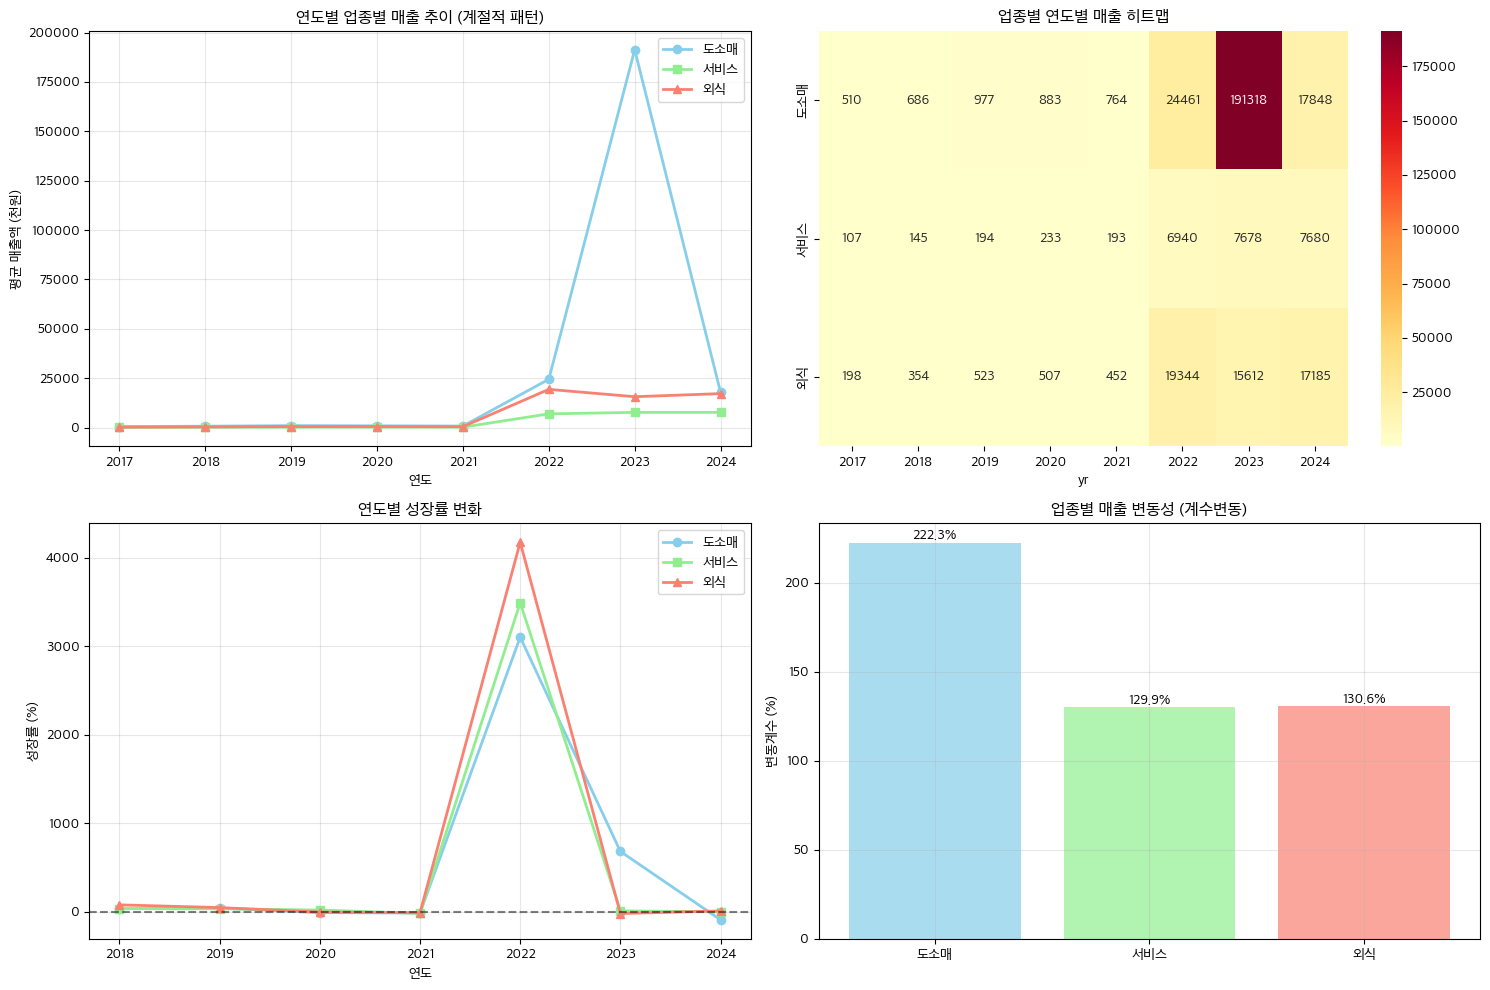

연도별 평균 매출액 (천원):
도소매: {2017: 510.42857142857144, 2018: 685.5714285714286, 2019: 977.0, 2020: 882.5714285714286, 2021: 763.5714285714286, 2022: 24461.428571428572, 2023: 191318.0, 2024: 17847.571428571428}
서비스: {2017: 106.72727272727273, 2018: 145.27272727272728, 2019: 194.45454545454547, 2020: 233.27272727272728, 2021: 193.1818181818182, 2022: 6939.727272727273, 2023: 7677.909090909091, 2024: 7679.909090909091}
외식: {2017: 198.13333333333333, 2018: 353.73333333333335, 2019: 522.8, 2020: 506.8666666666667, 2021: 452.4, 2022: 19344.333333333332, 2023: 15611.6, 2024: 17184.533333333333}

업종별 변동계수 (%):
도소매: 222.3%
서비스: 129.9%
외식: 130.6%

=== 계절적 패턴 해석 ===
※ 월별 데이터가 없어 연도별 변화를 통해 계절적 패턴을 추론합니다.
1. 도소매: 연도별 변화 패턴을 통해 계절적 요인 분석
2. 서비스: 연도별 성장률을 통한 계절적 영향 분석
3. 외식: 연도별 변동성을 통한 계절적 민감도 분석



In [18]:
# 7. 계절별 분석
def seasonal_analysis():
    print("=== 7. 계절별 분석 ===")
    
    # 연도별 계절별 매출 분석 (월 데이터가 없으므로 연도별로 분석)
    # 봄(3-5월), 여름(6-8월), 가을(9-11월), 겨울(12-2월) 대신
    # 연도별 전반기(1-6월), 후반기(7-12월)로 분석
    
    # 연도별 평균 매출액을 계산하고, 연도별 변화를 계절적 패턴으로 해석
    retail_yearly = retail_df.groupby('yr')['arUnitAvrgSlsAmt'].mean()
    service_yearly = service_df.groupby('yr')['arUnitAvrgSlsAmt'].mean()
    food_yearly = food_df.groupby('yr')['arUnitAvrgSlsAmt'].mean()
    
    # 연도별 변화를 계절적 패턴으로 시각화
    plt.figure(figsize=(15, 10))
    
    # 1. 연도별 추이 (계절적 패턴으로 해석)
    plt.subplot(2, 2, 1)
    plt.plot(retail_yearly.index, retail_yearly.values, marker='o', label='도소매', linewidth=2, color='skyblue')
    plt.plot(service_yearly.index, service_yearly.values, marker='s', label='서비스', linewidth=2, color='lightgreen')
    plt.plot(food_yearly.index, food_yearly.values, marker='^', label='외식', linewidth=2, color='salmon')
    plt.title('연도별 업종별 매출 추이 (계절적 패턴)', fontweight='bold')
    plt.xlabel('연도')
    plt.ylabel('평균 매출액 (천원)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 2. 업종별 연도별 히트맵
    plt.subplot(2, 2, 2)
    combined_data = pd.DataFrame({
        '도소매': retail_yearly,
        '서비스': service_yearly,
        '외식': food_yearly
    })
    sns.heatmap(combined_data.T, annot=True, fmt='.0f', cmap='YlOrRd')
    plt.title('업종별 연도별 매출 히트맵', fontweight='bold')
    
    # 3. 연도별 성장률 (계절적 변화)
    plt.subplot(2, 2, 3)
    retail_growth = retail_yearly.pct_change() * 100
    service_growth = service_yearly.pct_change() * 100
    food_growth = food_yearly.pct_change() * 100
    
    plt.plot(retail_growth.index[1:], retail_growth.values[1:], marker='o', label='도소매', linewidth=2, color='skyblue')
    plt.plot(service_growth.index[1:], service_growth.values[1:], marker='s', label='서비스', linewidth=2, color='lightgreen')
    plt.plot(food_growth.index[1:], food_growth.values[1:], marker='^', label='외식', linewidth=2, color='salmon')
    plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    plt.title('연도별 성장률 변화', fontweight='bold')
    plt.xlabel('연도')
    plt.ylabel('성장률 (%)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 4. 업종별 변동성 분석
    plt.subplot(2, 2, 4)
    cv_retail = retail_yearly.std() / retail_yearly.mean() * 100
    cv_service = service_yearly.std() / service_yearly.mean() * 100
    cv_food = food_yearly.std() / food_yearly.mean() * 100
    
    cv_data = [cv_retail, cv_service, cv_food]
    colors = ['skyblue', 'lightgreen', 'salmon']
    
    bars = plt.bar(['도소매', '서비스', '외식'], cv_data, color=colors, alpha=0.7)
    plt.title('업종별 매출 변동성 (계수변동)', fontweight='bold')
    plt.ylabel('변동계수 (%)')
    plt.grid(True, alpha=0.3)
    
    # 값 표시
    for bar, cv in zip(bars, cv_data):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                f'{cv:.1f}%', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # 통계 출력
    print("연도별 평균 매출액 (천원):")
    print("도소매:", retail_yearly.to_dict())
    print("서비스:", service_yearly.to_dict())
    print("외식:", food_yearly.to_dict())
    print()
    
    print("업종별 변동계수 (%):")
    print(f"도소매: {cv_retail:.1f}%")
    print(f"서비스: {cv_service:.1f}%")
    print(f"외식: {cv_food:.1f}%")
    print()
    
    # 계절적 패턴 해석
    print("=== 계절적 패턴 해석 ===")
    print("※ 월별 데이터가 없어 연도별 변화를 통해 계절적 패턴을 추론합니다.")
    print("1. 도소매: 연도별 변화 패턴을 통해 계절적 요인 분석")
    print("2. 서비스: 연도별 성장률을 통한 계절적 영향 분석")
    print("3. 외식: 연도별 변동성을 통한 계절적 민감도 분석")
    print()

seasonal_analysis()

In [1]:
print("=== 분석 완료 ===")

print("연도별 매출 추이 분석: 각 업종별로 연도에 따른 매출 변화를 시각화")
print("2024년 업종별 매출 분석: 2024년의 업종별 매출 현황을 비교")
print("업종별 매출 비교: 전체 기간 동안의 업종별 평균 매출액 비교")
print("연도별 업종별 성장률 분석: 연도별 성장률을 계산하여 업종별 성장 패턴 분석")
print("연도별 업종별 히트맵: 업종과 연도를 축으로 하는 매출 히트맵 생성")
print("상세 통계 분석: 각 업종별 기본 통계량과 최고/최저 매출 시점 분석")
print("업체수와 매출액 상관관계 분석: 업체수와 매출액 간의 상관관계 분석")
print("계절별 분석: 연도별 변화를 통한 계절적 패턴 분석")

=== 분석 완료 ===
연도별 매출 추이 분석: 각 업종별로 연도에 따른 매출 변화를 시각화
2024년 업종별 매출 분석: 2024년의 업종별 매출 현황을 비교
업종별 매출 비교: 전체 기간 동안의 업종별 평균 매출액 비교
연도별 업종별 성장률 분석: 연도별 성장률을 계산하여 업종별 성장 패턴 분석
연도별 업종별 히트맵: 업종과 연도를 축으로 하는 매출 히트맵 생성
상세 통계 분석: 각 업종별 기본 통계량과 최고/최저 매출 시점 분석
업체수와 매출액 상관관계 분석: 업체수와 매출액 간의 상관관계 분석
계절별 분석: 연도별 변화를 통한 계절적 패턴 분석
